## Fake News Detection - Part 2
### Importing Libraries

In [1]:
## Pandas Library is used to read data files  
import pandas as pd
## Numpy is library to create and handle arrays into machine
import numpy as np
# Matplotlib is used to create figures and plots 
import matplotlib.pyplot as plt
# SKLearn library is used for all machine learning related tasks
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
# Time library is used to handle machine time
import time

# Read datasets

In [2]:
## To Avoid Error casused by large file
fake = pd.read_csv("../dataset_new/Fake.csv",low_memory=False)
true = pd.read_csv("../dataset_new/True.csv",low_memory=False)

In [3]:
## Gettign No of obsrevation into rows and No of Feature into columns for Fake Class
fake.shape

(22827, 4)

In [4]:
## Getting No of obsrevation into rows and No of Feature into columns for True Class
true.shape

(21416, 4)

# Data cleaning and preparation

In [5]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [6]:
# Concatenate both dataframes into a single dataframe
data = pd.concat([fake, true]).reset_index(drop = True)

## Getting Matrix size for combined dataframe (Target/label is at last inedx, that's why it is converted from Mx4 to Mx5 now)
data.shape

(44243, 5)

In [7]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [8]:
# Displaying few of samples from the dataset
data.head()

,title,text,subject,date,target
0,Trump draws ire after urging Russia to find 'm...,MIAMI/WASHINGTON (Reuters) - Republican Donald...,Politics,"July 27, 2016",true
1,Trump spends more time than predecessors in Wh...,WASHINGTON (Reuters) - In his first 100 days i...,Politics,"May 3, 2017",true
2,JUST IN: CLOSE FRIEND of Hillary Clinton Who P...,"Houston, Texas trial lawyer and Democrat mega-...",World News,"Nov 19, 2017",fake
3,HYPOCRITE BILLY CRYSTAL INJECTS JAB At Trump I...,The bashing of Donald Trump is getting so old ...,World News,"Jun 11, 2016",fake
4,Red States Think A Bag Of Weed Is More Danger...,Some red state Republican legislators are havi...,World News,"March 21, 2016",fake


In [9]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
# Displaying few of samples from the dataset
data.head()

,title,text,subject,target
0,Trump draws ire after urging Russia to find 'm...,MIAMI/WASHINGTON (Reuters) - Republican Donald...,Politics,true
1,Trump spends more time than predecessors in Wh...,WASHINGTON (Reuters) - In his first 100 days i...,Politics,true
2,JUST IN: CLOSE FRIEND of Hillary Clinton Who P...,"Houston, Texas trial lawyer and Democrat mega-...",World News,fake
3,HYPOCRITE BILLY CRYSTAL INJECTS JAB At Trump I...,The bashing of Donald Trump is getting so old ...,World News,fake
4,Red States Think A Bag Of Weed Is More Danger...,Some red state Republican legislators are havi...,World News,fake


In [10]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
# Displaying few of samples from the dataset
data.head()

,text,subject,target
0,MIAMI/WASHINGTON (Reuters) - Republican Donald...,Politics,true
1,WASHINGTON (Reuters) - In his first 100 days i...,Politics,true
2,"Houston, Texas trial lawyer and Democrat mega-...",World News,fake
3,The bashing of Donald Trump is getting so old ...,World News,fake
4,Some red state Republican legislators are havi...,World News,fake


In [11]:
# Convert all the values from text column to lowercase
print(data['text'])

data['text'] = data['text'].apply(lambda x: x.lower())
# Displaying few of samples from the dataset
data.head()

0        MIAMI/WASHINGTON (Reuters) - Republican Donald...
1        WASHINGTON (Reuters) - In his first 100 days i...
2        Houston, Texas trial lawyer and Democrat mega-...
3        The bashing of Donald Trump is getting so old ...
4        Some red state Republican legislators are havi...
                               ...                        
44238    WASHINGTON (Reuters) - Democrats on the U.S. S...
44239    MANCHESTER, England (Reuters) - British Prime ...
44240     Are there any Trump donors on the team? GREAT...
44241    Chicago doesn t tend to be one of the cities o...
44242    BELFAST (Reuters) - The British government on ...
Name: text, Length: 44243, dtype: object


,text,subject,target
0,miami/washington (reuters) - republican donald...,Politics,true
1,washington (reuters) - in his first 100 days i...,Politics,true
2,"houston, texas trial lawyer and democrat mega-...",World News,fake
3,the bashing of donald trump is getting so old ...,World News,fake
4,some red state republican legislators are havi...,World News,fake


In [12]:
# Remove punctuations in text column if any 

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [13]:
# Displaying few of samples from the dataset
data.head()

,text,subject,target
0,miamiwashington reuters republican donald tru...,Politics,true
1,washington reuters in his first 100 days in o...,Politics,true
2,houston texas trial lawyer and democrat megado...,World News,fake
3,the bashing of donald trump is getting so old ...,World News,fake
4,some red state republican legislators are havi...,World News,fake


In [14]:
# Removing stopwords
# Mightbe it gives error in mac, if it gives error in mac, you can remove from line 3 to line 12 (else word) and keep only
# keep this only ->  nltk.download('stopwords')
# From line 3 to line 12, it is just checking whether the stopwords file is already downloaded or not
import os
base_dir = (r"C:\Users\\")
user = os.getlogin()
filename =(r"\AppData\Roaming\nltk_data\corpora\stopwords.zip")
fullpath = (base_dir + user + filename)

import nltk
if fullpath:
    print('File Already Exist : ',fullpath)
else:
    nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')
# Removing stop word in Text column
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

File Already Exist :  C:\Users\\Rashid Rao\AppData\Roaming\nltk_data\corpora\stopwords.zip


In [15]:
# Displaying few of samples from the dataset
data.head()

,text,subject,target
0,miamiwashington reuters republican donald trum...,Politics,true
1,washington reuters first 100 days office donal...,Politics,true
2,houston texas trial lawyer democrat megadonor ...,World News,fake
3,bashing donald trump getting old tiresome peop...,World News,fake
4,red state republican legislators severe emotio...,World News,fake


In [16]:
# Shape of Data 
data.shape

(44243, 3)

# Splitting Data according to Subjects

In [17]:
## Subject No 1 == Politics
data_1 = data[data['subject'] == 'Politics']
# Displaying few of samples from the dataset
data_1.head()

,text,subject,target
0,miamiwashington reuters republican donald trum...,Politics,true
1,washington reuters first 100 days office donal...,Politics,true
5,reuters us senator chuck grassley asked depart...,Politics,true
6,washington reuters us presidentelect donald tr...,Politics,true
16,washington reuters president donald trump chie...,Politics,true


In [18]:
# Shape of Data After Selecting Subject 1
data_1.shape

(17694, 3)

In [19]:
## Subject No 2 == World News
data_2 = data[data['subject'] == 'World News']
# Displaying few of samples from the dataset
data_2.head()

,text,subject,target
2,houston texas trial lawyer democrat megadonor ...,World News,fake
3,bashing donald trump getting old tiresome peop...,World News,fake
4,red state republican legislators severe emotio...,World News,fake
7,nairobi reuters swearing alternative president...,World News,true
8,conservative reporter brave enough grab mic cl...,World News,fake


In [20]:
# Shape of Data After Selecting Subject 2
data_2.shape

(26545, 3)

# Basic data exploration

target
fake     6423
true    11271
Name: text, dtype: int64


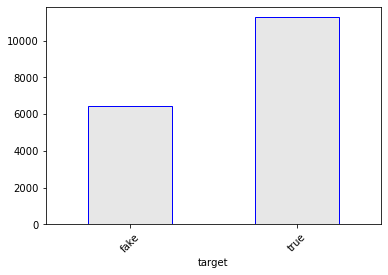

In [21]:
# How many fake and real articles in Subject 1?
print(data_1.groupby(['target'])['text'].count())
data_1.groupby(['target'])['text'].count().plot(kind="bar",color=(0.1, 0.1, 0.1, 0.1),edgecolor='blue')
plt.xticks(rotation=45)
plt.show()

target
fake    16400
true    10145
Name: text, dtype: int64


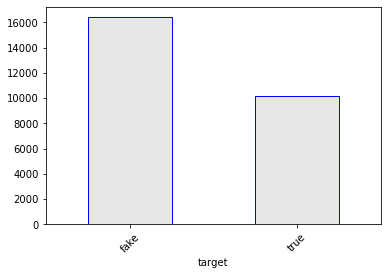

In [22]:
# How many fake and real articles in Subject 2?
print(data_2.groupby(['target'])['text'].count())
data_2.groupby(['target'])['text'].count().plot(kind="bar",color=(0.1, 0.1, 0.1, 0.1),edgecolor='blue')
plt.xticks(rotation=45)
plt.show()

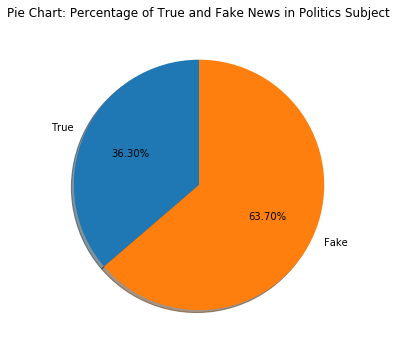

In [23]:
# Show Percentage of True and Fake News  for Subject 1

import matplotlib.pyplot as plt
classes=['True','Fake']

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = classes
sizes =  data_1.groupby(['target'])['text'].count()

fig1, ax1 = plt.subplots(figsize=(5, 6))
ax1.pie(sizes, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart: Percentage of True and Fake News in Politics Subject')
plt.show()

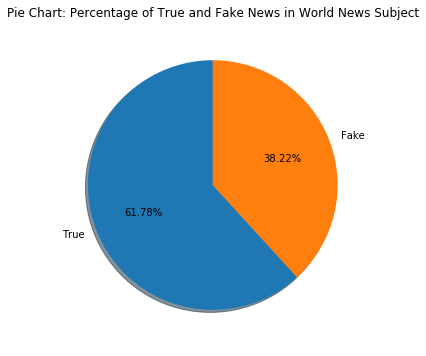

In [24]:
## Show Percentage of True and Fake News  for Subject 2
import matplotlib.pyplot as plt
classes=['True','Fake']

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = classes
sizes =  data_2.groupby(['target'])['text'].count()

fig1, ax1 = plt.subplots(figsize=(5, 6))
ax1.pie(sizes, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart: Percentage of True and Fake News in World News Subject')
plt.show()

# Modeling

In [25]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

## User defined function to create Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Peparing the data

In [26]:
# Split the data for Subject 1
# test size = 0.2 means it will split 80% data for training and rest 20% for the testing
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(data_1['text'], data_1.target, test_size=0.2, random_state=42)

In [27]:
# Split the data for Subject 2
# test size = 0.2 means it will split 80% data for training and rest 20% for the testing
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(data_2['text'], data_2.target, test_size=0.2, random_state=42)

In [28]:
## Creating Dictionaries to Store Results
dct_1 = dict()
dct_time_1 = dict()
dct_2 = dict()
dct_time_2 = dict()

# Naive Bayes

In [29]:
# Importing functions from SKLearn Library
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

In [30]:
# For Subject 1
## Getting machine time to evaluate how much time will algorithm take to train 
start = time.time()
# Training the model
model = pipe.fit(X_train_1, y_train_1)
stop = time.time()
# Showing Training Time taken
print(f"Training time for Naive Bayes: {round((stop - start),2)}s")
# Predicting Labels from Test Set by Trained Model
prediction = model.predict(X_test_1)
# Showing Test Accuracy by Trained Classifier
print("accuracy: {}%".format(round(accuracy_score(y_test_1, prediction)*100,2)))
## Storing Test Accuracy and Training Time in the data dictionaries for Plotting at the end
dct_1['Naive Bayes'] = round(accuracy_score(y_test_1, prediction)*100,2)
dct_time_1['Naive Bayes'] = round((stop - start),2)

Training time for Naive Bayes: 3.08s
accuracy: 79.8%


Confusion matrix, without normalization


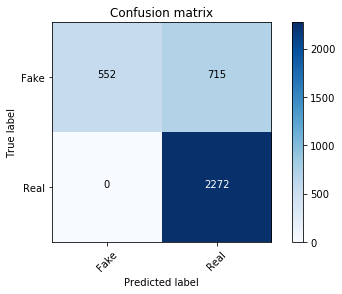

In [31]:
## CONFUSION MATRIX FOR SUBJECT 1
cm = metrics.confusion_matrix(y_test_1, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [32]:
## For Subject 2
start = time.time()
# Training the model
model = pipe.fit(X_train_2, y_train_2)
## Getting machine time to evaluate how much time will algorithm take to train 
stop = time.time()
# Showing Training Time taken
print(f"Training time for Naive Bayes: {round((stop - start),2)}s")
# Predicting Labels from Test Set by Trained Model
prediction = model.predict(X_test_2)
print("accuracy: {}%".format(round(accuracy_score(y_test_2, prediction)*100,2)))
## Storing Test Accuracy and Training Time in the data dictionaries for Plotting at the end
dct_2['Naive Bayes'] = round(accuracy_score(y_test_2, prediction)*100,2)
dct_time_2['Naive Bayes'] = round((stop - start),2)

Training time for Naive Bayes: 4.68s
accuracy: 97.21%


Confusion matrix, without normalization


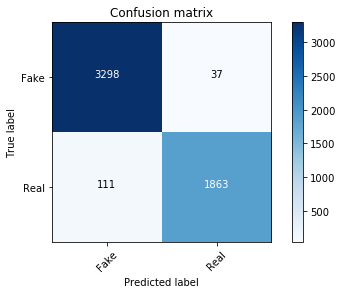

In [33]:
## CONFUSION MATRIX FOR SUBJECT 2
cm = metrics.confusion_matrix(y_test_2, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Logistic regression

In [34]:
# Vectorizing and applying TF-IDF
# Importing functions from SKLearn Library
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

In [35]:
## For Subject 1
## Getting machine time to evaluate how much time will algorithm take to train 
start = time.time()
# Training the model
model = pipe.fit(X_train_1, y_train_1)
## Getting machine time to evaluate how much time will algorithm take to train 
stop = time.time()
# Showing Training Time taken
print(f"Training time for Logistic Regression: {round((stop - start),2)}s")
# Predicting Labels from Test Set by Trained Model
prediction = model.predict(X_test_1)
print("accuracy: {}%".format(round(accuracy_score(y_test_1, prediction)*100,2)))

## Storing Test Accuracy and Training Time in the data dictionaries for Plotting at the end
dct_1['Logistic Regression'] = round(accuracy_score(y_test_1, prediction)*100,2)
dct_time_1['Logistic Regression'] = round((stop - start),2)


Training time for Logistic Regression: 4.73s
accuracy: 97.6%


Confusion matrix, without normalization


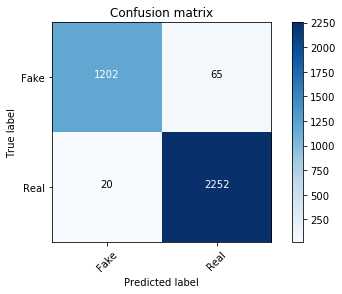

In [36]:
## CONFUSION MATRIX FOR SUBJECT 1
cm = metrics.confusion_matrix(y_test_1, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [37]:
## For Subject 2
## Getting machine time to evaluate how much time will algorithm take to train 
start = time.time()

# Training the model
model = pipe.fit(X_train_2, y_train_2)
## Getting machine time to evaluate how much time will algorithm take to train 
stop = time.time()
# Showing Training Time taken
print(f"Training time for Logistic Regression: {round((stop - start),2)}s")
# Predicting Labels from Test Set by Trained Model
prediction = model.predict(X_test_2)
print("accuracy: {}%".format(round(accuracy_score(y_test_2, prediction)*100,2)))
## Storing Test Accuracy and Training Time in the data dictionaries for Plotting at the end
dct_2['Logistic Regression'] = round(accuracy_score(y_test_2, prediction)*100,2)
dct_time_2['Logistic Regression'] = round((stop - start),2)

Training time for Logistic Regression: 5.78s
accuracy: 99.15%


Confusion matrix, without normalization


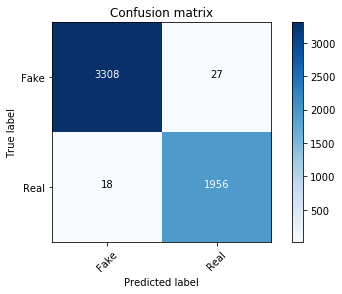

In [38]:
## CONFUSION MATRIX FOR SUBJECT 2
cm = metrics.confusion_matrix(y_test_2, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Decision Tree

In [39]:
# Importing functions from SKLearn Library
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])

In [40]:
## Training for Subject 1
## Getting machine time to evaluate how much time will algorithm take to train 
start = time.time()
# Training the model
model = pipe.fit(X_train_1, y_train_1)
## Getting machine time to evaluate how much time will algorithm take to train 
stop = time.time()
print(f"Training time for Decision Tree : {round((stop - start),2)}s")

# Predicting Labels from Test Set by Trained Model
prediction = model.predict(X_test_1)
print("accuracy: {}%".format(round(accuracy_score(y_test_1, prediction)*100,2)))
## Storing Test Accuracy and Training Time in the data dictionaries for Plotting at the end
dct_1['Decision Tree'] = round(accuracy_score(y_test_1, prediction)*100,2)
dct_time_1['Decision Tree'] = round((stop - start),2)

Training time for Decision Tree : 6.19s
accuracy: 99.38%


Confusion matrix, without normalization


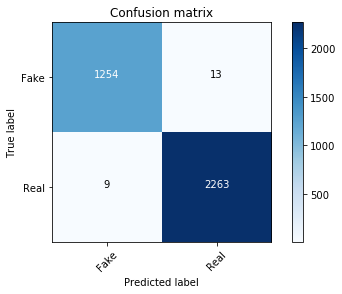

In [41]:
## CONFUSION MATRIX FOR SUBJECT 1
cm = metrics.confusion_matrix(y_test_1, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [42]:
## Training for Subject 2
## Getting machine time to evaluate how much time will algorithm take to train 
start = time.time()
# Training the model
model = pipe.fit(X_train_2, y_train_2)
## Getting machine time to evaluate how much time will algorithm take to train 
stop = time.time()
print(f"Training time for Decision Tree : {round((stop - start),2)}s")

# Predicting Labels from Test Set by Trained Model
prediction = model.predict(X_test_2)
print("accuracy: {}%".format(round(accuracy_score(y_test_2, prediction)*100,2)))
## Storing Test Accuracy and Training Time in the data dictionaries for Plotting at the end
dct_2['Decision Tree'] = round(accuracy_score(y_test_2, prediction)*100,2)
dct_time_2['Decision Tree'] = round((stop - start),2)

Training time for Decision Tree : 8.06s
accuracy: 99.68%


Confusion matrix, without normalization


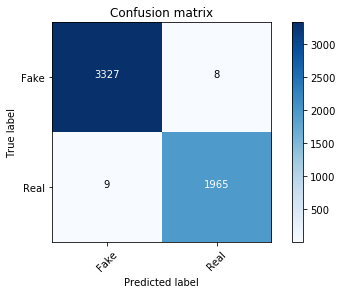

In [43]:
## CONFUSION MATRIX FOR SUBJECT 2
cm = metrics.confusion_matrix(y_test_2, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Random Forest

In [44]:
# Importing functions from SKLearn Library
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])


In [45]:
## Training for Subject 1
## Getting machine time to evaluate how much time will algorithm take to train 
start = time.time()
# Training the model
model = pipe.fit(X_train_1, y_train_1)
## Getting machine time to evaluate how much time will algorithm take to train 
stop = time.time()
print(f"Training time for Random Forest : {round((stop - start),2)}s")
# Predicting Labels from Test Set by Trained Model
prediction = model.predict(X_test_1)
print("accuracy: {}%".format(round(accuracy_score(y_test_1, prediction)*100,2)))
## Storing Test Accuracy and Training Time in the data dictionaries for Plotting at the end
dct_1['Random Forest'] = round(accuracy_score(y_test_1, prediction)*100,2)
dct_time_1['Random Forest'] = round((stop - start),2)

Training time for Random Forest : 10.76s
accuracy: 96.98%


Confusion matrix, without normalization


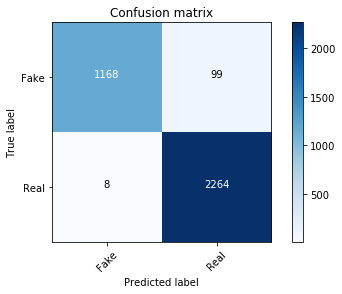

In [46]:
## CONFUSION MATRIX FOR SUBJECT 1
cm = metrics.confusion_matrix(y_test_1, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [47]:
## Training for Subject 2
## Getting machine time to evaluate how much time will algorithm take to train 
start = time.time()
# Training the model
model = pipe.fit(X_train_2, y_train_2)
## Getting machine time to evaluate how much time will algorithm take to train 
stop = time.time()
print(f"Training time for Random Forest : {round((stop - start),2)}s")
# Predicting Labels from Test Set by Trained Model
prediction = model.predict(X_test_2)
print("accuracy: {}%".format(round(accuracy_score(y_test_2, prediction)*100,2)))
## Storing Test Accuracy and Training Time in the data dictionaries for Plotting at the end
dct_2['Random Forest'] = round(accuracy_score(y_test_2, prediction)*100,2)
dct_time_2['Random Forest'] = round((stop - start),2)

Training time for Random Forest : 17.79s
accuracy: 99.02%


Confusion matrix, without normalization


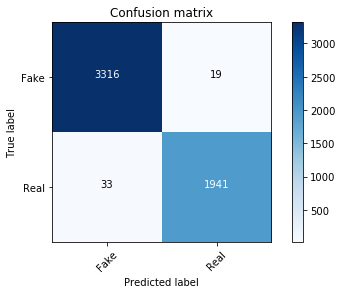

In [48]:
## CONFUSION MATRIX FOR SUBJECT 2
cm = metrics.confusion_matrix(y_test_2, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# SVM

In [49]:
# Importing functions from SKLearn Library
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])


In [50]:
## Training for Subject 1
## Getting machine time to evaluate how much time will algorithm take to train 
start = time.time()
# Training the model
model = pipe.fit(X_train_1, y_train_1)
## Getting machine time to evaluate how much time will algorithm take to train 
stop = time.time()
print(f"Training time for SVM : {round((stop - start),2)}s")
# Predicting Labels from Test Set by Trained Model
prediction = model.predict(X_test_1)
print("accuracy: {}%".format(round(accuracy_score(y_test_1, prediction)*100,2)))
## Storing Test Accuracy and Training Time in the data dictionaries for Plotting at the end
dct_1['SVM'] = round(accuracy_score(y_test_1, prediction)*100,2)
dct_time_1['SVM'] = round((stop - start),2)

Training time for SVM : 60.76s
accuracy: 98.67%


Confusion matrix, without normalization


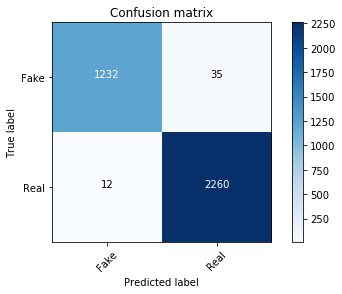

In [51]:
## CONFUSION MATRIX FOR SUBJECT 1
cm = metrics.confusion_matrix(y_test_1, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [52]:
## Training for Subject 2
## Getting machine time to evaluate how much time will algorithm take to train 
start = time.time()
# Training the model
model = pipe.fit(X_train_2, y_train_2)
## Getting machine time to evaluate how much time will algorithm take to train 
stop = time.time()
print(f"Training time for SVM : {round((stop - start),2)}s")
# Predicting Labels from Test Set by Trained Model
prediction = model.predict(X_test_2)
print("accuracy: {}%".format(round(accuracy_score(y_test_2, prediction)*100,2)))
## Storing Test Accuracy and Training Time in the data dictionaries for Plotting at the end
dct_2['SVM'] = round(accuracy_score(y_test_2, prediction)*100,2)
dct_time_2['SVM'] = round((stop - start),2)

Training time for SVM : 135.13s
accuracy: 99.68%


Confusion matrix, without normalization


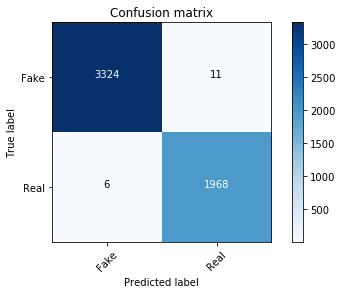

In [53]:
## CONFUSION MATRIX FOR SUBJECT 2
cm = metrics.confusion_matrix(y_test_2, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# KNN

In [54]:
# Importing functions from SKLearn Library
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])



In [55]:
## Training for Subject 1
## Getting machine time to evaluate how much time will algorithm take to train 
start = time.time()
# Training the model
model = pipe.fit(X_train_1, y_train_1)
## Getting machine time to evaluate how much time will algorithm take to train 
stop = time.time()
print(f"Training time for KNN : {round((stop - start),2)}s")
# Predicting Labels from Test Set by Trained Model
prediction = model.predict(X_test_1)
print("accuracy: {}%".format(round(accuracy_score(y_test_1, prediction)*100,2)))
## Storing Test Accuracy and Training Time in the data dictionaries for Plotting at the end
dct_1['KNN'] = round(accuracy_score(y_test_1, prediction)*100,2)
dct_time_1['KNN'] = round((stop - start),2)

Training time for KNN : 2.82s
accuracy: 86.8%


Confusion matrix, without normalization


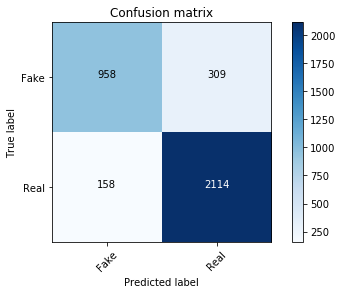

In [56]:
## CONFUSION MATRIX FOR SUBJECT 1
cm = metrics.confusion_matrix(y_test_1, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [57]:
## Training for Subject 2
## Getting machine time to evaluate how much time will algorithm take to train 
start = time.time()
# Training the model
model = pipe.fit(X_train_2, y_train_2)
## Getting machine time to evaluate how much time will algorithm take to train 
stop = time.time()
print(f"Training time for KNN : {round((stop - start),2)}s")
# Predicting Labels from Test Set by Trained Model
prediction = model.predict(X_test_2)
print("accuracy: {}%".format(round(accuracy_score(y_test_2, prediction)*100,2)))
## Storing Test Accuracy and Training Time in the data dictionaries for Plotting at the end
dct_2['KNN'] = round(accuracy_score(y_test_2, prediction)*100,2)
dct_time_2['KNN'] = round((stop - start),2)

Training time for KNN : 4.58s
accuracy: 77.02%


Confusion matrix, without normalization


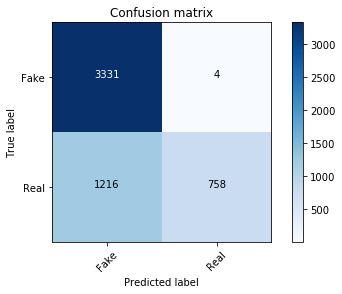

In [58]:
## CONFUSION MATRIX FOR SUBJECT 2
cm = metrics.confusion_matrix(y_test_2, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Passive Aggressive Classifier

In [59]:
# Importing functions from SKLearn Library
from sklearn.linear_model import PassiveAggressiveClassifier

clf = PassiveAggressiveClassifier(max_iter=1000, random_state=0, tol=1e-3)
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

In [60]:
## Training for Subject 1
## Getting machine time to evaluate how much time will algorithm take to train 
start = time.time()
# Training the model
model = pipe.fit(X_train_1, y_train_1)
## Getting machine time to evaluate how much time will algorithm take to train 
stop = time.time()
print(f"Training time for KNN : {round((stop - start),2)}s")
# Predicting Labels from Test Set by Trained Model
prediction = model.predict(X_test_1)
print("accuracy: {}%".format(round(accuracy_score(y_test_1, prediction)*100,2)))
## Storing Test Accuracy and Training Time in the data dictionaries for Plotting at the end
dct_1['Passive Aggressive'] = round(accuracy_score(y_test_1, prediction)*100,2)
dct_time_1['Passive Aggressive'] = round((stop - start),2)

Training time for KNN : 3.04s
accuracy: 98.78%


Confusion matrix, without normalization


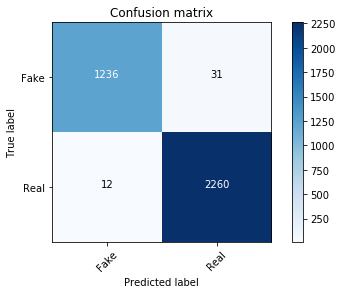

In [61]:
## CONFUSION MATRIX FOR SUBJECT 1
cm = metrics.confusion_matrix(y_test_1, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [62]:
## Training for Subject 2
## Getting machine time to evaluate how much time will algorithm take to train 
start = time.time()
# Training the model
model = pipe.fit(X_train_2, y_train_2)
## Getting machine time to evaluate how much time will algorithm take to train 
stop = time.time()
print(f"Training time for KNN : {round((stop - start),2)}s")
# Predicting Labels from Test Set by Trained Model
prediction = model.predict(X_test_2)
print("accuracy: {}%".format(round(accuracy_score(y_test_2, prediction)*100,2)))
## Storing Test Accuracy and Training Time in the data dictionaries for Plotting at the end
dct_2['Passive Aggressive'] = round(accuracy_score(y_test_2, prediction)*100,2)
dct_time_2['Passive Aggressive'] = round((stop - start),2)

Training time for KNN : 4.45s
accuracy: 99.74%


Confusion matrix, without normalization


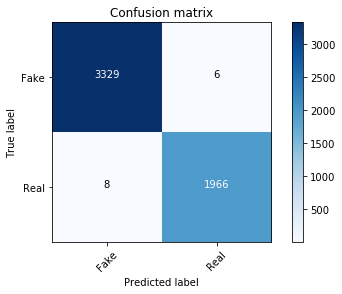

In [63]:
## CONFUSION MATRIX FOR SUBJECT 2
cm = metrics.confusion_matrix(y_test_2, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Comparing Different Models for Subject 1

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

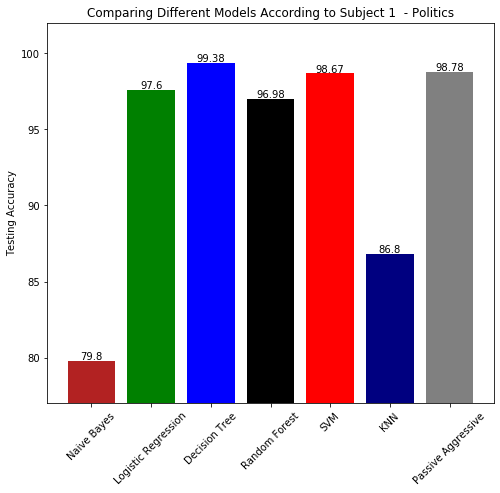

In [64]:
# Importing matplotlib for creating plots
import matplotlib.pyplot as plt
# importing maths library for mathematical function (floor)
import math
plt.figure(figsize=(8,7))
# Show Bars equal to number of Classifiers
# In below line, .keys are showing the names in data dictionary and .keys is showing the values in that index
plt.bar(list(dct_1.keys()),list(dct_1.values()), color=['firebrick', 'green', 'blue', 'black', 'red','navy','gray'])
# Defining user defined function to show text on the top of each bar 
def addtext(x,y):
    for i in range(len(x)):
        plt.text(i,1.0008*y[i],y[i],ha = 'center',rotation=0)
# Calling user defined function to show text on the top of each bar           
addtext(list(dct_1.keys()),list(dct_1.values()))
## Setting High and low limit of y labels   
max_value_dct = math.floor(max(dct_1.values()))
min_value_dct = math.floor(min(dct_1.values()))
plt.ylabel('Testing Accuracy')
plt.title('Comparing Different Models According to Subject 1  - Politics')
plt.ylim(min_value_dct-2,max_value_dct+3)

# plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))
plt.xticks(rotation=45)

# Comparing Different Models for Subject 2

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

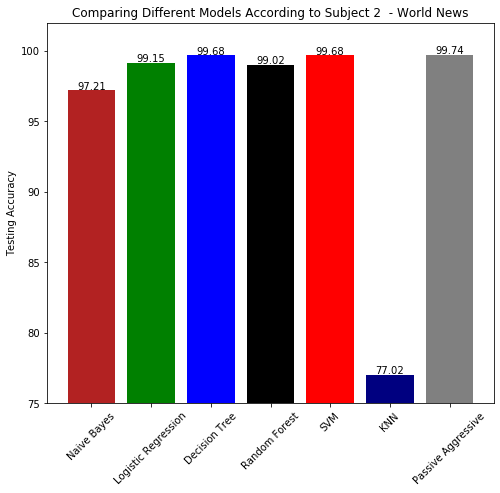

In [65]:
# Importing matplotlib for creating plots
import matplotlib.pyplot as plt
# importing maths library for mathematical function (floor)
import math
plt.figure(figsize=(8,7))
# Change color of each bar
# Show Bars equal to number of Classifiers
# In below line, .keys are showing the names in data dictionary and .keys is showing the values in that index

plt.bar(list(dct_2.keys()),list(dct_2.values()), color=['firebrick', 'green', 'blue', 'black', 'red','navy','gray'])
# Defining user defined function to show text on the top of each bar 
def addtext(x,y):
    for i in range(len(x)):
        plt.text(i,1.0008*y[i],y[i],ha = 'center',rotation=0)
# Calling user defined function to show text on the top of each bar           
addtext(list(dct_2.keys()),list(dct_2.values()))
## Setting High and low limit of y labels   
max_value_dct = math.floor(max(dct_2.values()))
min_value_dct = math.floor(min(dct_2.values()))
plt.ylabel('Testing Accuracy')

plt.title('Comparing Different Models According to Subject 2  - World News')
plt.ylim(min_value_dct-2,max_value_dct+3)

# plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

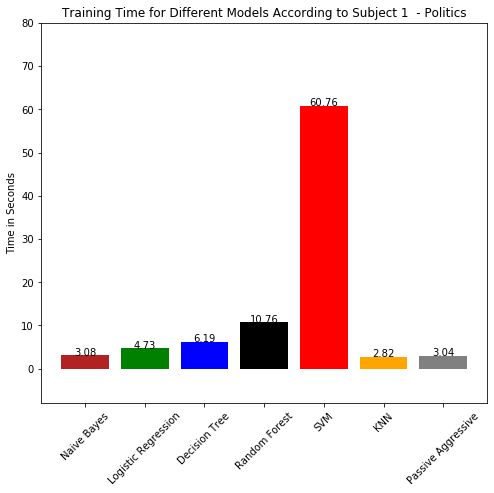

In [66]:
# Importing matplotlib for creating plots
import matplotlib.pyplot as plt
# importing maths library for mathematical function (floor)
import math

plt.figure(figsize=(8,7))
# Show Bars equal to number of Classifiers
# In below line, .keys are showing the names in data dictionary and .keys is showing the values in that index
plt.bar(list(dct_time_1.keys()),list(dct_time_1.values()), color=['firebrick', 'green', 'blue', 'black', 'red','orange','gray'])
# Defining user defined function to show text on the top of each bar 
def addtext(x,y):
    for i in range(len(x)):
        plt.text(i,1.0016*y[i],y[i],ha = 'center',rotation=0)
## Setting High and low limit of y labels       
max_value_dct_time = math.floor(max(dct_time_1.values()))
min_value_dct_time = math.floor(min(dct_time_1.values()))
# Calling user defined function to show text on the top of each bar                          
addtext(list(dct_time_1.keys()),list(dct_time_1.values()))

plt.title('Training Time for Different Models According to Subject 1  - Politics')
plt.ylim(min_value_dct_time-10,max_value_dct_time+20)
plt.ylabel('Time in Seconds')

# plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))
plt.xticks(rotation=45)

# Comparing Time Taken by Different Models for Subject 2

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

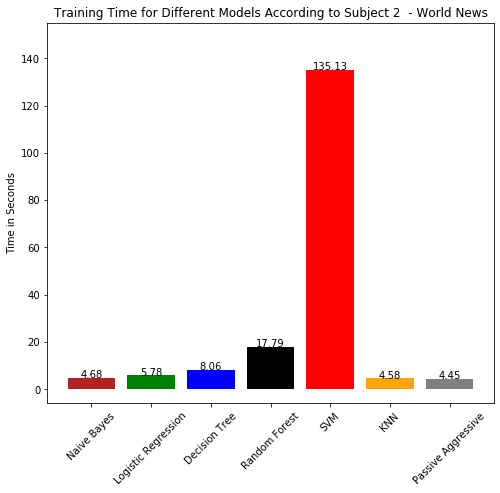

In [67]:
# Importing matplotlib for creating plots
import matplotlib.pyplot as plt
# importing maths library for mathematical function (floor)
import math

plt.figure(figsize=(8,7))
# Show Bars equal to number of Classifiers
# In below line, .keys are showing the names in data dictionary and .keys is showing the values in that index
plt.bar(list(dct_time_2.keys()),list(dct_time_2.values()), color=['firebrick', 'green', 'blue', 'black', 'red','orange','gray'])
# Defining user defined function to show text on the top of each bar 
def addtext(x,y):
    for i in range(len(x)):
        plt.text(i,1.0016*y[i],y[i],ha = 'center',rotation=0)
## Setting High and low limit of y labels       
max_value_dct_time = math.floor(max(dct_time_2.values()))
min_value_dct_time = math.floor(min(dct_time_2.values()))
 # Calling user defined function to show text on the top of each bar                         
addtext(list(dct_time_1.keys()),list(dct_time_2.values()))

plt.title('Training Time for Different Models According to Subject 2  - World News')
plt.ylim(min_value_dct_time-10,max_value_dct_time+20)
plt.ylabel('Time in Seconds')

# plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))
plt.xticks(rotation=45)

# Testing Accuracy Comparison

[0 1 2 3 4 5 6]
[79.8, 97.6, 99.38, 96.98, 98.67, 86.8, 98.78]
[97.21, 99.15, 99.68, 99.02, 99.68, 77.02, 99.74]


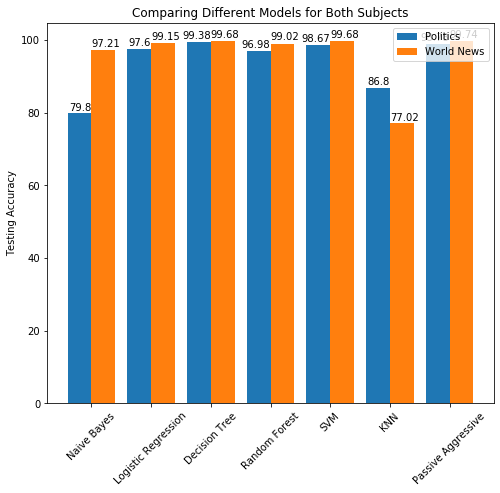

In [68]:
# Importing matplotlib for creating plots
import matplotlib.pyplot as plt
# importing maths library for mathematical function (floor)
import math
plt.figure(figsize=(8,7))

x_axis = np.arange(len(dct_1))

# Change color of each bar
# Show Bars equal to number of Classifiers
# In below line, .keys are showing the names in data dictionary and .keys is showing the values in that index

plt.bar(x_axis -0.2,list(dct_1.values()),
           label = 'Politics',width=0.4)
plt.bar(x_axis +0.2,list(dct_2.values()),
           label = 'World News',width=0.4)


print(x_axis)
# Defining user defined function to show text on the top of each bar 
def addtext1(x,y):
    print(y)
    for i in range(len(x)):
        plt.text(i,1.010*y[i],y[i],ha = 'right',rotation=0)

def addtext2(x,y):
    print(y)
    for i in range(len(x)):
        plt.text(i,1.010*y[i],y[i],ha = 'left',rotation=0)

plt.ylabel('Testing Accuracy')
plt.title('Comparing Different Models for Both Subjects')
# plt.ylim(min_value_dct-2,max_value_dct+2)

plt.xticks(x_axis, list(dct_1.keys()))
# Calling user defined function to show text on the top of each bar   
addtext1(list(dct_1.keys()),list(dct_1.values()))
addtext2(list(dct_2.keys()),list(dct_2.values()))

# plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))
plt.xticks(rotation=45)
plt.legend()
plt.show()

# print(list(dct_full.keys()))

# Training Time Comparison

[0 1 2 3 4 5 6]
[3.08, 4.73, 6.19, 10.76, 60.76, 2.82, 3.04]
[4.68, 5.78, 8.06, 17.79, 135.13, 4.58, 4.45]


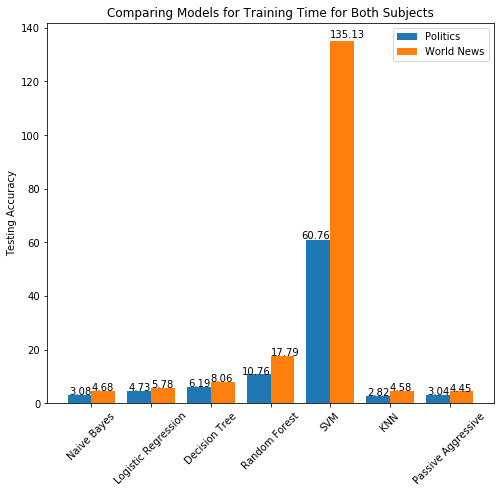

In [69]:
# Importing matplotlib for creating plots
import matplotlib.pyplot as plt
# importing maths library for mathematical function (floor)
import math
plt.figure(figsize=(8,7))

x_axis = np.arange(len(dct_time_1))

# Change color of each bar
# Show Bars equal to number of Classifiers
# In below line, .keys are showing the names in data dictionary and .keys is showing the values in that index

plt.bar(x_axis -0.2,list(dct_time_1.values()),
           label = 'Politics',width=0.4)
plt.bar(x_axis +0.2,list(dct_time_2.values()),
           label = 'World News',width=0.4)


print(x_axis)
# Defining user defined function to show text on the top of each bar 
def addtext1(x,y):
    print(y)
    for i in range(len(x)):
        plt.text(i,1.010*y[i],y[i],ha = 'right',rotation=0)

def addtext2(x,y):
    print(y)
    for i in range(len(x)):
        plt.text(i,1.010*y[i],y[i],ha = 'left',rotation=0)

plt.ylabel('Testing Accuracy')
plt.title('Comparing Models for Training Time for Both Subjects')
# plt.ylim(min_value_dct-2,max_value_dct+2)

plt.xticks(x_axis, list(dct_time_1.keys()))
# Calling user defined function to show text on the top of each bar   
addtext1(list(dct_time_1.keys()),list(dct_time_1.values()))
addtext2(list(dct_time_2.keys()),list(dct_time_2.values()))

# plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))
plt.xticks(rotation=45)
plt.legend()
plt.show()

# print(list(dct_full.keys()))